# K Nearest Neighbors Classifiers

So far we've covered learning via probability (naive Bayes) and learning via errors (regression). Here we'll cover learning via similarity. This means we look for the datapoints that are most similar to the observation we are trying to predict.

#### What type of model is k-nearest neighbors algorithm (k-NN)?
A supervised, classification, nonparametric, instance-based model.

Supervised
----

You have to have labeled data. Each points belong to a group.

Your new point will be classfied into other existing groups.

Parametric vs Nonparametric Models
-----

Parametric: Make an assumption about form of the function of the data

Nonparametric: Do __not__ make an assumption about the functional form.

Instance-based
---------

Uses only the actual observed data to classify. There is no model!

<center><img src="images/knn2.png" width="50%"/></center>

Let's start by the simplest example: **Nearest Neighbor**.

## Nearest Neighbor

Let's use this example: classifying a song as either "rock" or "jazz". For this data we have measures of duration in seconds and loudness in loudness units (we're not going to be using decibels since that isn't a linear measure, which would create some problems we'll get into later).

In [1]:
import numpy as np
import scipy
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

music = pd.DataFrame()

# Some data to play with.
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]

# We know whether the songs in our training data are jazz or not.
music['jazz'] = [ 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
                  0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
                  1, 1, 1, 1, 0, 0, 1, 1, 0, 0]

In [2]:
music.head()

,duration,loudness,jazz
0,184,18,1
1,134,34,0
2,243,43,0
3,186,36,0
4,122,22,1


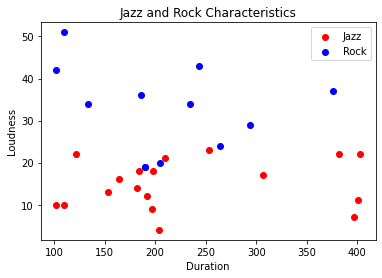

In [3]:
# Look at our data.
plt.scatter(
    music[music['jazz'] == 1].duration,
    music[music['jazz'] == 1].loudness,
    color='red'
)
plt.scatter(
    music[music['jazz'] == 0].duration,
    music[music['jazz'] == 0].loudness,
    color='blue'
)
plt.legend(['Jazz', 'Rock'])
plt.title('Jazz and Rock Characteristics')
plt.xlabel('Duration')
plt.ylabel('Loudness')
plt.show()

The simplest form of a similarity model is the Nearest Neighbor model. This works quite simply: when trying to predict an observation, we find the closest (or _nearest_) known observation in our training data and use that value to make our prediction. Here we'll use the model as a classifier, the outcome of interest will be a category.

To find which observation is "nearest" we need some kind of way to measure distance. Typically we use _Euclidean distance_, the standard distance measure that you're familiar with from geometry. With one observation in n-dimensions $(x_1, x_2, ...,x_n)$ and the other $(w_1, w_2,...,w_n)$:

$$ \sqrt{(x_1-w_1)^2 + (x_2-w_2)^2+...+(x_n-w_n)^2} $$

## Other distance functions:

1-norm distance, aka City Block (Manhattan) distance
------

<center><img src="images/1_norm_1.svg" width="35%"/></center>

<center><img src="images/1_norm_2.jpg" width="35%"/></center>


2-norm distance, aka Eculidian (as the crow flies)
----- 

<center><img src="images/2_norm_1.svg" width="35%"/></center>

<center><img src="images/2_norm_2.jpg" width="35%"/></center>


p-norm distance, aka Minkowski distance of order p
----- 

Generalization notion of normed vector space distance.

When p = 1, Manhattan distance
When p = 2, Euclidean distance

<center><img src="images/p_norm.svg" width="35%"/></center>


You can technically define any distance measure you want, and there are times where this customization may be valuable. As a general standard, however, we'll use Euclidean distance.

Now that we have a distance measure from each point in our training data to the point we're trying to predict the model can find the datapoint with the smallest distance and then apply that category to our prediction.

Let's try running this model, using the SKLearn package.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=3)

In [ ]:
X = music[['loudness', 'duration']]
Y = music.jazz
neighbors.fit(X,Y)

In [ ]:
neighbors.predict_proba([[30, 160]])

In [ ]:
## Predict for a song with 24 loudness that's 190 seconds long.
neighbors.predict([[30, 160]])

It's as simple as that. Looks like our model is predicting that 24 loudness, 190 second long song is _not_ jazz. All it takes to train the model is a dataframe of independent variables and a dataframe of dependent outcomes.

You'll note that for this example, we used the `KNeighborsClassifier` method from SKLearn. This is because Nearest Neighbor is a simplification of K-Nearest Neighbors. The jump, however, isn't that far.

## K-Nearest Neighbors

<center><img src="images/knn1.png" width="50%"/></center>

**K-Nearest Neighbors** (or "**KNN**") is the logical extension of Nearest Neighbor. Instead of looking at just the single nearest datapoint to predict an outcome, we look at several of the nearest neighbors, with $k$ representing the number of neighbors we choose to look at. Each of the $k$ neighbors gets to vote on what the predicted outcome should be.

This does a couple of valuable things. Firstly, it smooths out the predictions. If only one neighbor gets to influence the outcome, the model explicitly overfits to the training data. Any single outlier can create pockets of one category prediction surrounded by a sea of the other category.

This also means instead of just predicting classes, we get implicit probabilities. If each of the $k$ neighbors gets a vote on the outcome, then the probability of the test example being from any given class $i$ is:
$$ \frac{votes_i}{k} $$

And this applies for all classes present in the training set. Our example only has two classes, but this model can accommodate as many classes as the data set necessitates. To come up with a classifier prediction it simply takes the class for which that fraction is maximized.

Let's expand our initial nearest neighbors model from above to a KNN with a $k$ of 5.

In [ ]:
neighbors = KNeighborsClassifier(n_neighbors=5)
X = music[['loudness', 'duration']]
Y = music.jazz
neighbors.fit(X,Y)

## Predict for a 24 loudness, 190 seconds long song.
print(neighbors.predict([[24, 190]]))
print(neighbors.predict_proba([[24, 190]]))

### predict vs predict_proba

If there are say 3 classes (say -1, 0, 1), predict will give "to which class the data point belongs to" i.e. either (-1 or 0 or 1). Predict_proba will give the probability that the data point belongs to each of the classes, like (0.2, 0.7, 0.1). 
In general, we can say that the "predict" function is a class decision function, where as the predict_proba is a more general form of predicting the probability for each of the classes. 

Now our test prediction has changed. In using the five nearest neighbors it appears that there were two votes for rock and three for jazz, so it was classified as a jazz song. This is different than our simpler Nearest Neighbors model. While the closest observation was in fact rock, there are more jazz songs in the nearest $k$ neighbors than rock.

We can visualize our decision bounds with something called a _mesh_. This allows us to generate a prediction over the whole space. Read the code below and make sure you can pull out what the individual lines do, consulting the documentation for unfamiliar methods if necessary.

## Normalization & Weighing

It can be a more obvious challenge if you were dealing with something where the relative scales are strikingly different. For example, if you were looking at buildings and you have height in floors and square footage, you'd have a model that would really only care about square footage since distance in that dimension would be a far greater number of units than the number of floors.

Turn all the values to be between 0 and 1 or -1 to 1 (same thing)


There is one more thing to address when talking about distance, and that is weighting. In the vanilla version of KNN, all k of the closest observations are given equal votes on what the outcome of our test observation should be. When the data is densely populated that isn't necessarily a problem.

However, sometimes the k nearest observations are not all similarly close to the test. In that case it may be useful to weight by distance. Functionally this will weight by the inverse of distance, so that closer datapoints (with a low distance) have a higher weight than further ones.

/Users/pradip/opt/miniconda3/envs/tutor/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


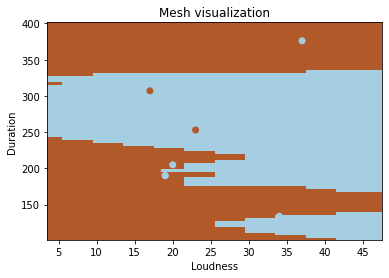

In [6]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

neighbors = KNeighborsClassifier(n_neighbors=5, weights="uniform")

# Our input data frame
X = pd.DataFrame({
    'loudness': music.loudness,
    'duration': music.duration
})

# Fit our model.
Y = music.jazz

neighbors.fit(X, Y)

# Our data. Converting from data frames to arrays for the mesh.
X = np.array(X)
Y = np.array(Y)

# Mesh size.
h = 4.0

# Plot the decision boundary. We assign a color to each point in the mesh.
x_min = X[:, 0].min() - .5
x_max = X[:, 0].max() + .5
y_min = X[:, 1].min() - .5
y_max = X[:, 1].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot.
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Loudness')
plt.ylabel('Duration')
plt.title('Mesh visualization')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

Looking at the visualization above, any new point that fell within a blue area would be predicted to be jazz, and any point that fell within a brown area would be predicted to be rock.

The boundaries above are strangly jagged here, and we'll get into that in more detail in the next lesson.

Also note that the visualization isn't completely continuous. There are an infinite number of points in this space, and we can't calculate the value for each one. That's where the mesh comes in. We set our mesh size (`h = 4.0`) to 4.0 above, which means we calculate the value for each point in a grid where the points are spaced 4.0 away from each other.

You can make the mesh size smaller to get a more continuous visualization, but at the cost of a more computationally demanding calculation. In the cell below, recreate the plot above with a mesh size of `10.0`. Then reduce the mesh size until you get a plot that looks good but still renders in a reasonable amount of time. When do you get a visualization that looks acceptably continuous? When do you start to get a noticeable delay?

/Users/pradip/opt/miniconda3/envs/tutor/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


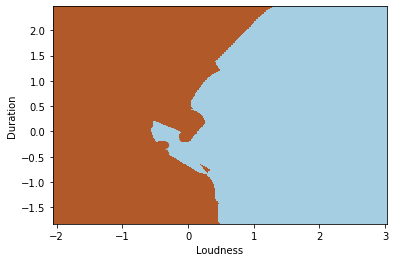

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats

neighbors = KNeighborsClassifier(n_neighbors=5, weights='distance')

# Our input data frame will be the z-scores this time instead of raw data.
# zscoring it is normalizing it
X = pd.DataFrame({
    'loudness': stats.zscore(music.loudness),
    'duration': stats.zscore(music.duration)
})

# Fit our model.
Y = music.jazz
neighbors.fit(X, Y)

# Arrays, not data frames, for the mesh.
X = np.array(X)
Y = np.array(Y)

# Mesh size.
h = .01

# Plot the decision boundary. We assign a color to each point in the mesh.
x_min = X[:,0].min() - .5
x_max = X[:,0].max() + .5
y_min = X[:,1].min() - .5
y_max = X[:,1].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Loudness')
plt.ylabel('Duration')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()